# **Lab 3 - Explainable and Trustworthy AI**


---



**Teaching Assistant**: Eleonora Poeta (eleonora.poeta@polito.it)

**Lab 3b:** Local post-hoc explainable models on structured data - SHAP


##**SHAP**



---


**SHAP** (**SH**apley **A**dditive ex**P**lanations) is a local explanation method designed to explain **individual predictions**. By dissecting the prediction of a specific *x* instance, it calculates the contribution of each feature to the outcome.

* Based on the theory of **Shapley values**, SHAP ensures a fair distribution of *credit* for collaborative tasks.

* Within SHAP, **each characteristic value** assumes the role of a **strategic "player "** in a predictive "game". The final goal of the *game* is to predict the outcome of a given instance, with each characteristic influencing the final prediction.




---

##**Exercise 1:**

The exercise requires the use of **SHAP** to explain the predictions of individual instances of the [Adult dataset](https://archive.ics.uci.edu/dataset/2/adult).



> The Adult dataset, also known as the "Census Income" dataset, contains demographic information about people, such as age, education, occupation, marital status and more, extracted from the 1994 U.S. Census Bureau database. **Each entry** in the dataset represents a **person**, and the associated **task** is to **predict whether an individual earns more than $50,000 per year** or less.


Below, you can find the **main steps of this exercise.** In addition, you will find in the unfolding a set of step-by-step instructions made to guide you in implementing your solution:



1. **Install** **SHAP** library.
2. **Load** the Adult dataset.
  * SHAP provides an instance of the Adult dataset directly into its [library](https://shap.readthedocs.io/en/latest/generated/shap.datasets.adult.html).
  * In particular, SHAP provides **two versions of Adult dataset:**
    * The first version is **already preprocessed**; therefore, it has neither missing values nor categorical values. We will use this version of the dataset for both the classifier and the explainer.
    * The second version is the **original** one. This is valuable for our SHAP analysis, as it produces results that are inherently meaningful and easily interpreted. For example, instead of denoting a feature as "feature_0=45", we obtain a more intuitive representation, such as "Age=45".

3. Split the Adult dataset. 80/20 train-test ratio.
4. Train a RandomForestClassifier and fit it over the training dataset. Evaluate the model.
5. Use the `shap.Explainer` to explain the instances `id=1` and `id=7` .
  * **Plot** with a bar chart from `matplotlib.pyplot` the **Shapley values** for the instances `id=1` and `id=7` .
  
  Local Explanations:
  * Plot the shap explanation for the instances `id=1` and `id=7` with:
      * [`shap.force_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.force_plot.html)
      * [`shap.waterfall_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.waterfall_plot.html)

  Global (for all features) Explanations:
  * Plot the shap explanation for the instances `id=1` and `id=7` with:
      * `shap.force_plot`
      * [`shap.summary_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html)
      * [`shap.dependence_plot`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.dependence_plot.html)

6. Do again point 5.) with [`shap.KernelExplainer`](https://shap.readthedocs.io/en/latest/generated/shap.KernelExplainer.html) and [`shap.ExactExplainer`](https://shap.readthedocs.io/en/latest/generated/shap.ExactExplainer.html)



### **Solution:**

#### 1.) Imports

In [1]:
! pip install -q shap

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

In [3]:
# To visualize shap plots
shap.initjs()

#### 2.) Load dataset

In [4]:
X, y = shap.datasets.adult()
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [5]:
# Load the data with display=True. This dataset still contains the categorical values.
X_display, y_display = shap.datasets.adult(display=True)

#### 3.) Split dataset

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####4.) Train the Random Forest Classifier

In [7]:
# Train a RandomForestClassifier

from sklearn.linear_model import LogisticRegression
rf_clf = LogisticRegression()
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Evaluate the model
accuracy = rf_clf.score(X_test, y_test)
accuracy

0.8054659910947336

#### 5.) SHAP - Explainer

[`shap.Explainer`](https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html) wants as parameters:


* A model object or a **prediction function** that computes the output of the model. We will use the **function** of the model that **predicts the probabilities of the classes** you are using (e.g. `.predict_proba` if you are using the Random Forest).
* A **`masker`**. The masker parameter in the SHAP explainer is an optional argument that allows you to **specify** a **masking function** for the input data. The masking function defines *how certain features are masked* or hidden during the explanation process.
  
  * Using the masker `shap.maskers.Independent(data=X_train)` you can do **Dataset-Based Masking** (via marginalization). In this case the masking behavior is derived from the provided dataset. The masker calculates summary statistics from the dataset (such as means, medians, or quantiles) and uses them to mask the features during the explanation process.





When using `explainer = shap.Explainer` you can have two results:


1.   From `explainer(X)` you obtain **shap_values_explanation** that does not only contains Shap values. It is an **Explanation** **object**.
  * For reasons of computational time, we will select a subset of the data set (`sample_data`) to provide to the explainer. Only the first 100 rows.
2.   From `explainer.shap_values(X)` you obtain a `numpy.ndarray` that contains *only* the Shapley values.
  * We are interested in explaining the Shapley values for the `class_label = 0`. So, you have to take only the shapley_values of this class.
3. We can also compute the **expected_value**.
  * In SHAP library the expected value is called `base_values`. Again you have to select only the one related to the class we want to explain (class 0).





In [ ]:
# Select the first 100 rows of the X dataset. This is the sample_data.
sample_data = X.loc[:100]

# Select the first 100 rows of the X_display dataset.
sample_X_display = X_display.loc[:100]

# Compute the masker
masker = shap.maskers.Independent(data = X_train)

# Instanciate the shap.Explainer
explainer = shap.Explainer(rf_clf.predict_proba, masker=masker)


# Calculate the explainer over the sample_data
shap_values_explanation = explainer(sample_data)

# Print the shap_values_explanation
print(type(shap_values_explanation))
print(shap_values_explanation[0])
print('-' * 80)

# Class for which we want to analyze the shapley values
class_index = 0  # Note that being a binary classification problem, the shapley values for the other class are -(shapley values of the class_index)


# Calculate the Shapley values with explainer.shap_values( ... )
shap_values_ndarray = explainer.shap_values(sample_data)[:, :, class_index]

print(type(shap_values_ndarray))
print(shap_values_ndarray[0])


# Calculate the expected_value
expected_value = shap_values_explanation.base_values[0][class_index] # this is the expected value for the class we want to explain -> class 0


PermutationExplainer explainer: 102it [00:25,  3.84it/s]


<class 'shap._explanation.Explanation'>
.values =
array([[-0.00019089,  0.00019089],
       [ 0.05036451, -0.05036451],
       [-0.03845874,  0.03845874],
       [ 0.07251026, -0.07251026],
       [ 0.00119603, -0.00119603],
       [ 0.13102821, -0.13102821],
       [ 0.00409719, -0.00409719],
       [-0.00106697,  0.00106697],
       [-0.04773117,  0.04773117],
       [ 0.00476168, -0.00476168],
       [ 0.00120235, -0.00120235],
       [ 0.01582139, -0.01582139]])

.base_values =
array([0.77300948, 0.22699052])

.data =
array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])
--------------------------------------------------------------------------------
<class 'numpy.ndarray'>
[-0.00017722  0.05038561 -0.03937563  0.07002852  0.00114243  0.13470589
  0.00397646 -0.00112625 -0.04650072  0.00449802  0.00124358  0.01473315]


In [ ]:
shap_values_ndarray[0]

array([ 0.03098059,  0.02008121, -0.06404527,  0.06476918,  0.03175431,
        0.08579918,  0.00113312, -0.00513044,  0.04417905,  0.00269498,
        0.02338769,  0.00085021])

#### Plots

Bar chart of Shapley values for the `id_instance=1`

In [ ]:
# Calculate the Shapley values with explainer.shap_values( ... )
shap_values_ndarray = explainer.shap_values(sample_data)[:, :, class_index]

Text(0.5, 1.0, 'Shapley values for instance 1 \n Predicted class: 0')

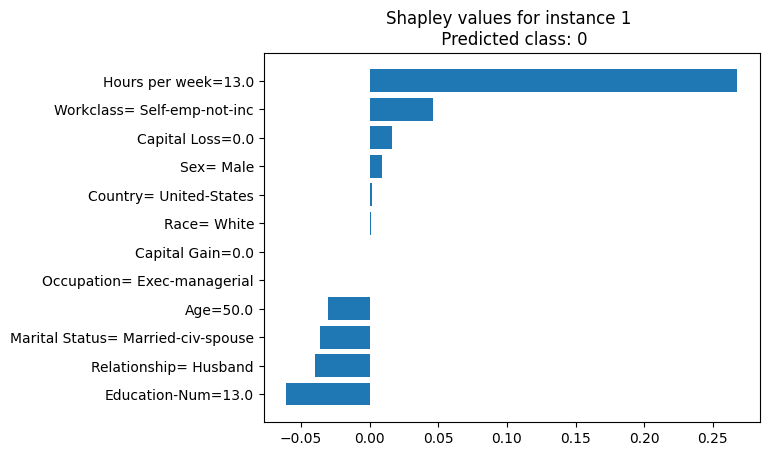

In [ ]:
id_instance = 1

# Sort feature indices based on SHAP values using np.argsort()
sorted_indices = np.argsort(shap_values_ndarray[id_instance])

# Get feature names and values for the instance
feature_names_values = np.array([f'{f}={value}' for f, value in zip(sample_X_display.columns, sample_X_display.iloc[id_instance].values)])

# Plot SHAP values
plt.barh(feature_names_values[sorted_indices], shap_values_ndarray[id_instance][sorted_indices])

# Predict class for the instance
predicted_class = int(rf_clf.predict(sample_data.iloc[id_instance:id_instance+1])[0])

# Plot title
plt.title(f'Shapley values for instance {id_instance} \n w.r.t {class_index}. Predicted class: {predicted_class}')


Bar chart of Shapley values for the `id_instance=7`

Text(0.5, 1.0, 'Shapley values for instance 7 \n wrt 0. Predicted class: 1')

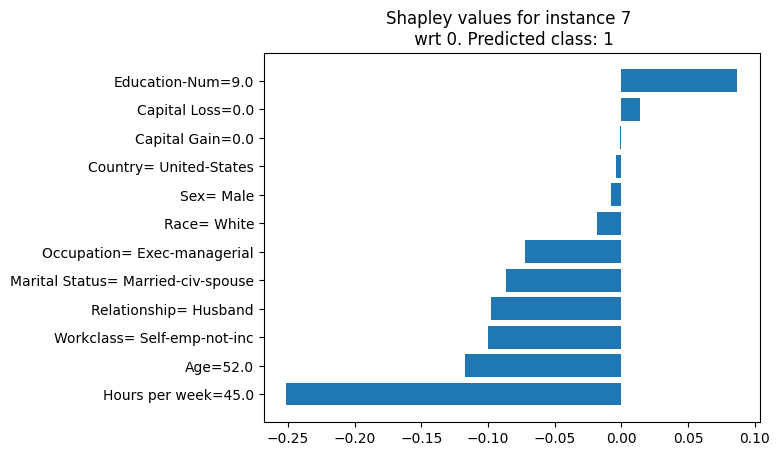

In [ ]:
id_instance = 7

# Sort feature indices based on SHAP values
sorted_indices = np.argsort(shap_values_ndarray[id_instance])

# Get feature names and values for the instance
feature_names_values = np.array([f'{f}={value}' for f, value in zip(sample_X_display.columns, sample_X_display.iloc[id_instance].values)])

# Plot SHAP values
plt.barh(feature_names_values[sorted_indices], shap_values_ndarray[id_instance][sorted_indices])

# Predict class for the instance
predicted_class = int(rf_clf.predict(sample_data.iloc[id_instance:id_instance+1])[0])

# Plot title
plt.title(f'Shapley values for instance {id_instance} \n w.r.t {class_index}. Predicted class: {predicted_class}')


SHAP Force plot - single instance


---

`shap.force_plot()` shows bars that indicate the **magnitude** and **direction** of the **influence of the features on the model prediction**. The graph also includes the base_value, which represents the average outcome of the model in the dataset, and an arrow indicating the final predicted value f(x) for the instance.




[0.89 0.11]


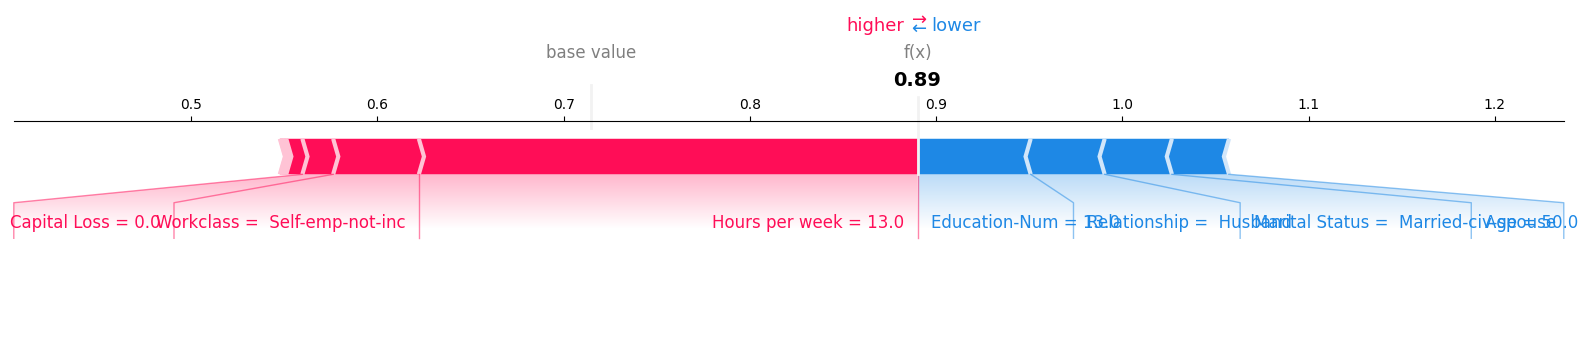

In [ ]:
id_instance = 1


print(rf_clf.predict_proba(sample_data)[id_instance])


shap.force_plot(base_value=expected_value, # the base_value is the expected_value
                shap_values=shap_values_ndarray[id_instance, :], # select the shap_value of the considered instance
                features=X_display.iloc[id_instance, :], # Use the X_display dataset to have meaningful result
                matplotlib=True)

[0.89 0.11]


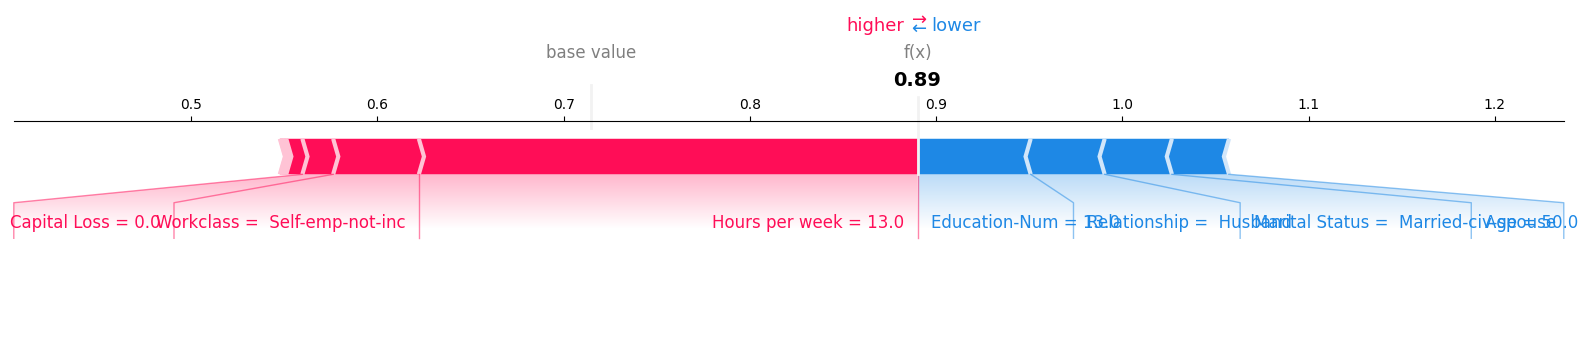

In [ ]:
# Complete with your code!
id_instance = 1


print(rf_clf.predict_proba(sample_data)[id_instance])


shap.force_plot(base_value= , # the base_value is the expected_value
                shap_values= , # select the shap_value of the considered instance
                features= , # Use the X_display dataset to have meaningful result
                matplotlib=True)

[0.06 0.94]


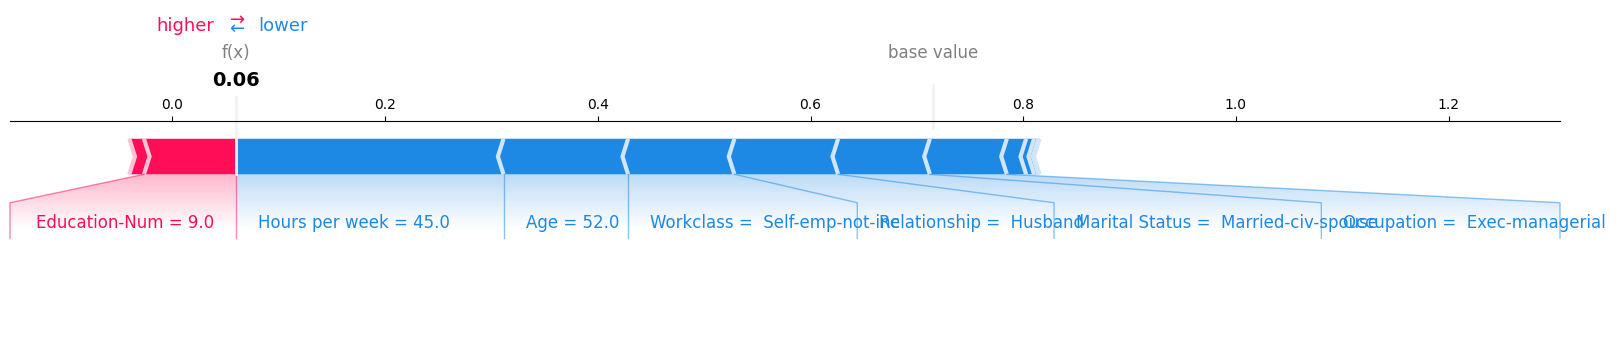

In [ ]:
id_instance = 7
print(rf_clf.predict_proba(sample_data)[id_instance])


shap.force_plot(base_value=expected_value,
                shap_values=shap_values_ndarray[id_instance, :],
                features=X_display.iloc[id_instance, :],
                matplotlib=True)

SHAP - waterfall plot

`shap.waterfall_plot` graph shows a sequence of horizontal bars, each representing the contribution of a feature to the overall forecast. The **bars** are **cascaded**, where each successive bar adds to the previous one, visually illustrating **how each characteristic incrementally affects the final forecast.** Positive contributions are displayed as red arrows going on the right, and negative contributions are blue arrows on the left.

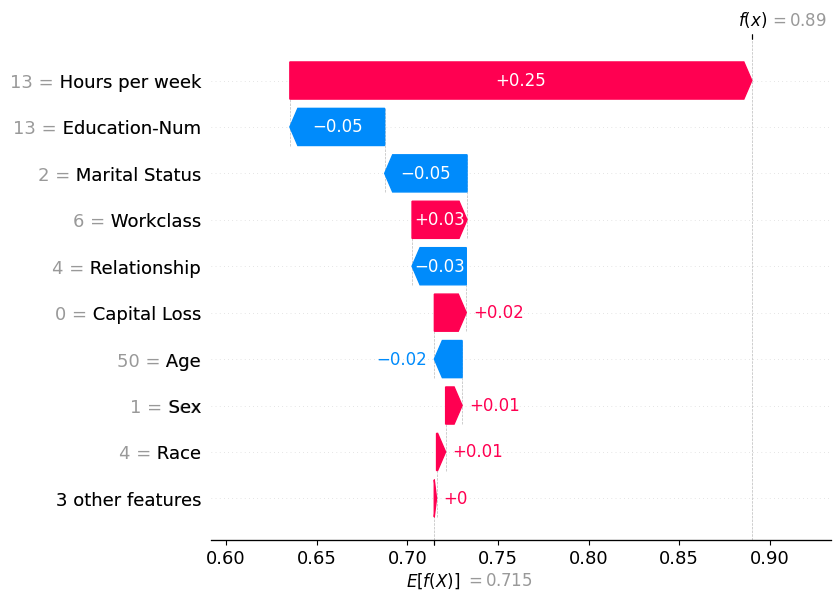

In [ ]:
id = 1
shap.waterfall_plot(shap_values=shap_values_explanation[id, :, class_index], # select the shap_value_explanation of the considered instance, for the class you want to explain. Nb: this wants an Explanation object.
                    max_display=10)

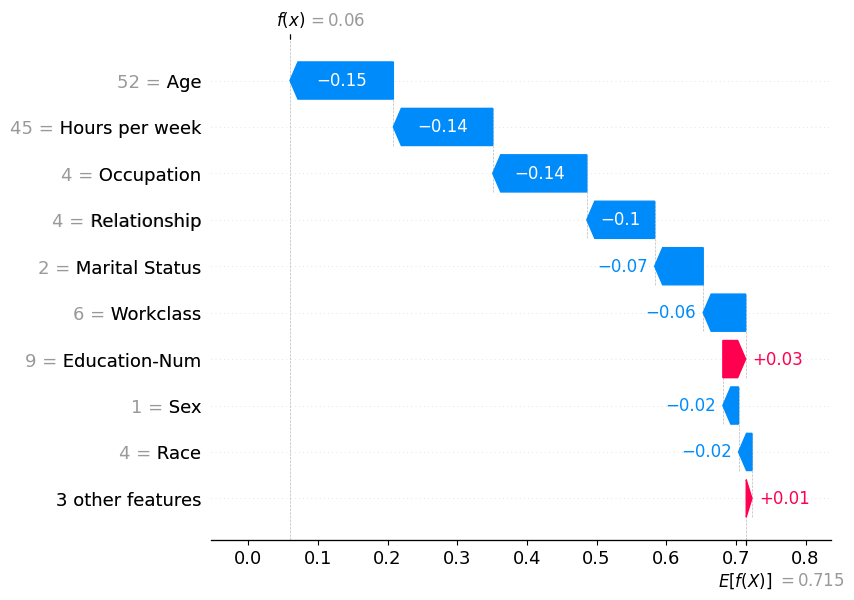

In [ ]:
id = 7
shap.waterfall_plot(shap_values=shap_values_explanation[id, :, class_index], max_display=10)

SHAP Force plot - multiple instances



---


For visualization reasons, if you are doing the Lab on Google Colab you can't visualize the output of the force_plot for multiple instances.

Unlikely before, now the `shap.force_plot `visualizes the impact of features across multiple instances concurrently.

In [ ]:
shap.force_plot(base_value=expected_value,
                shap_values=shap_values_ndarray[:10, :],
                features=X_display.iloc[:10, :])

SHAP Summary plot



---

* It is used to visualize the **summary** of **SHAP values** for all features in a dataset.  This plot is particularly useful for understanding the importance and directionality of different features in influencing model predictions.

* It provides the **average impact** of each feature on the model output magnitude.

* It **aggregates** the **absolute SHAP values** for each feature across all instances and then visualizes these aggregated values.



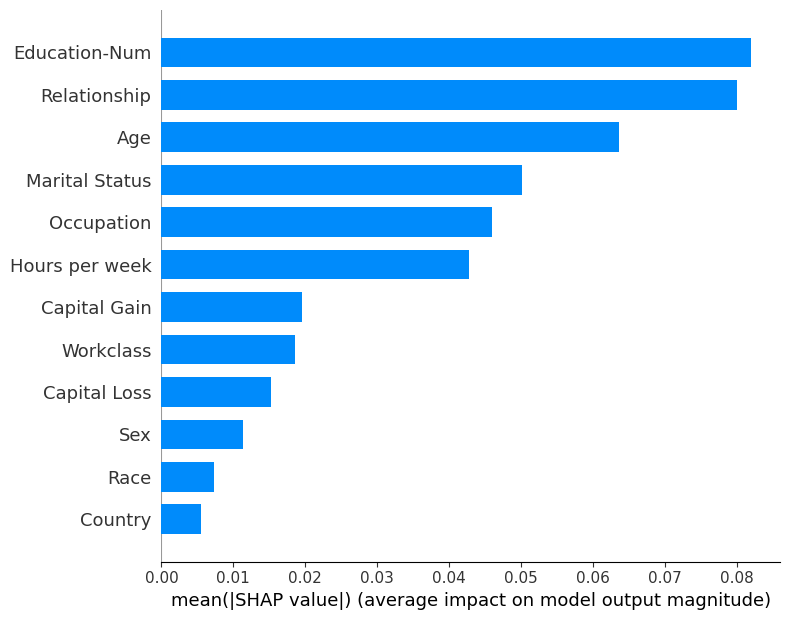

In [ ]:
# Summary plot. This consider ALL instances.
shap.summary_plot(shap_values=shap_values_ndarray,
                  features=X_display, # to display meaningful features use X_display
                  plot_type='bar')

SHAP dependence plot



---

The graph generated by `shap.dependence_plot ` typically consists of a scatter plot in which each point represents an instance of the dataset. The x-axis represents the values of the chosen feature, while the y-axis represents the corresponding SHAP values.


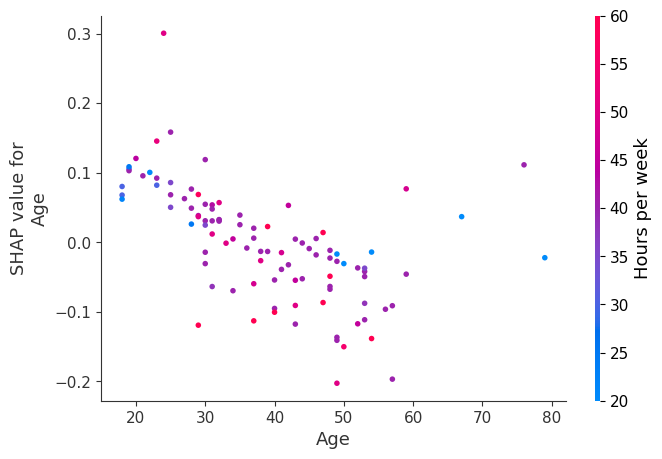

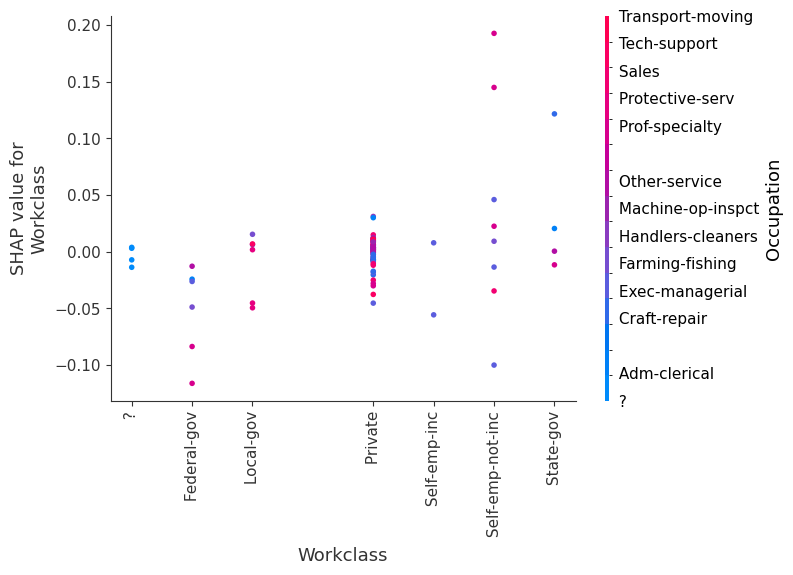

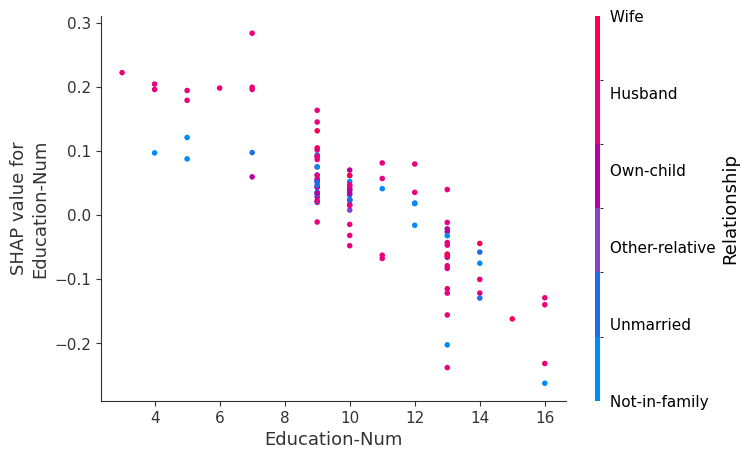

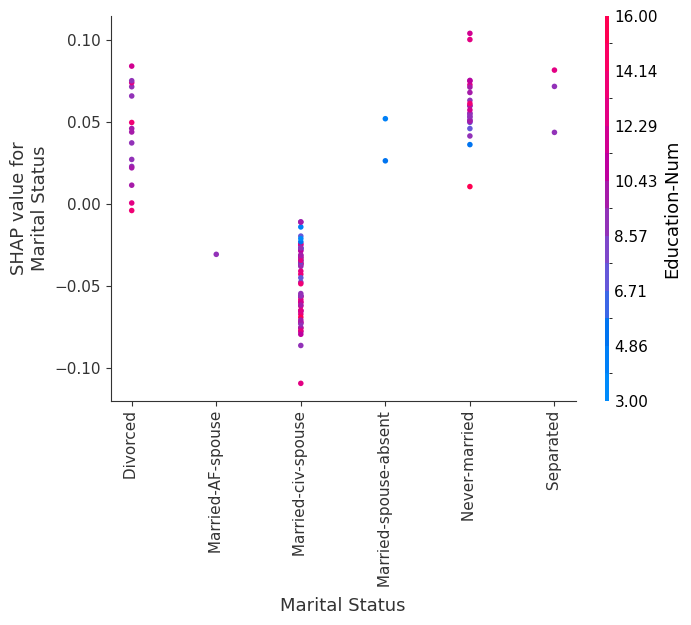

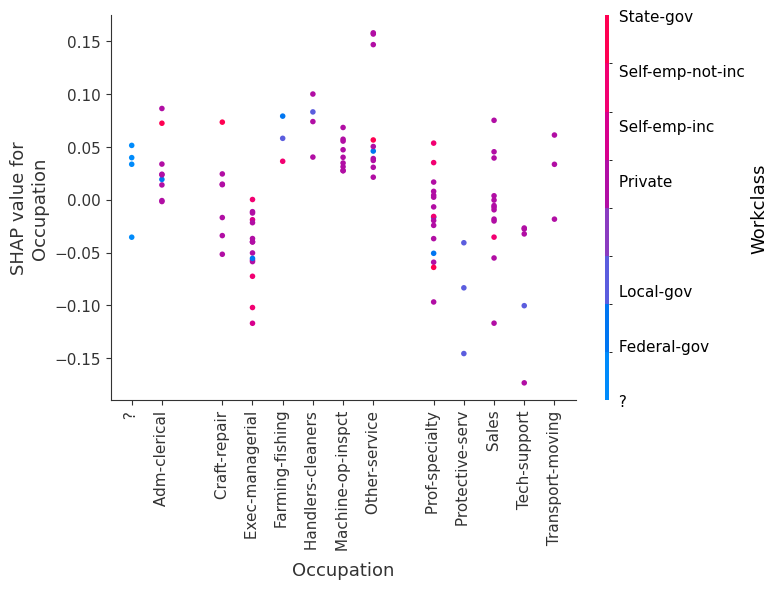

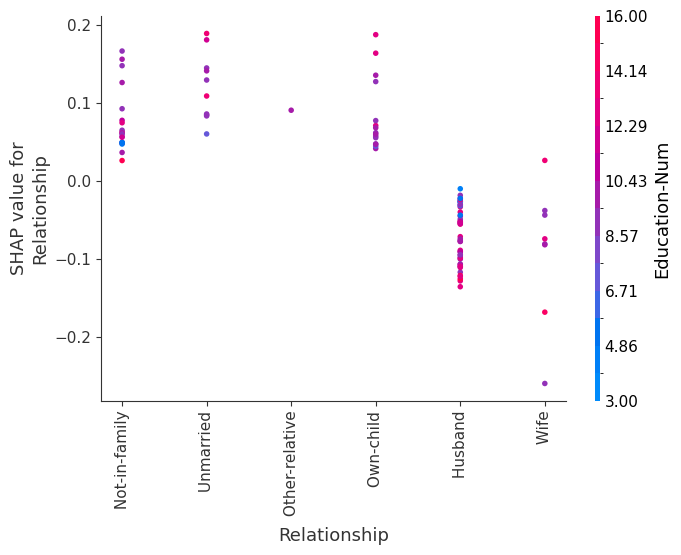

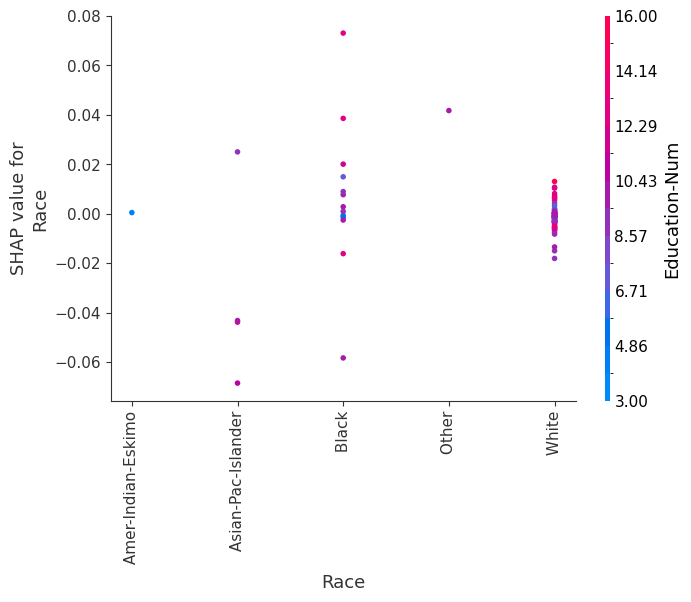

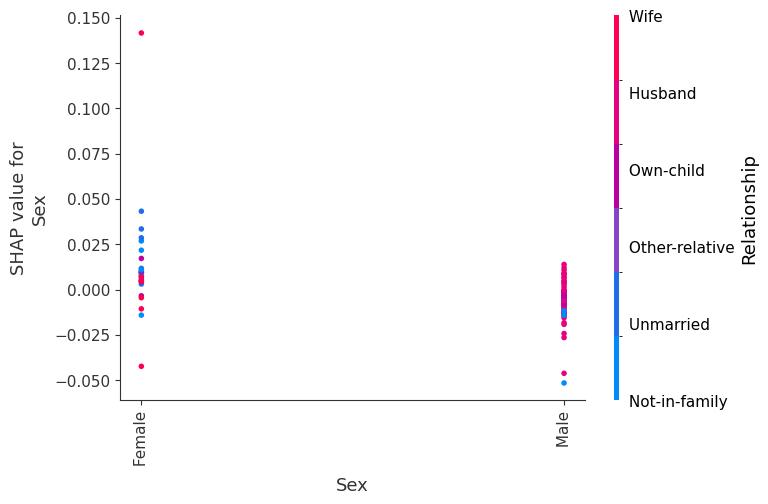

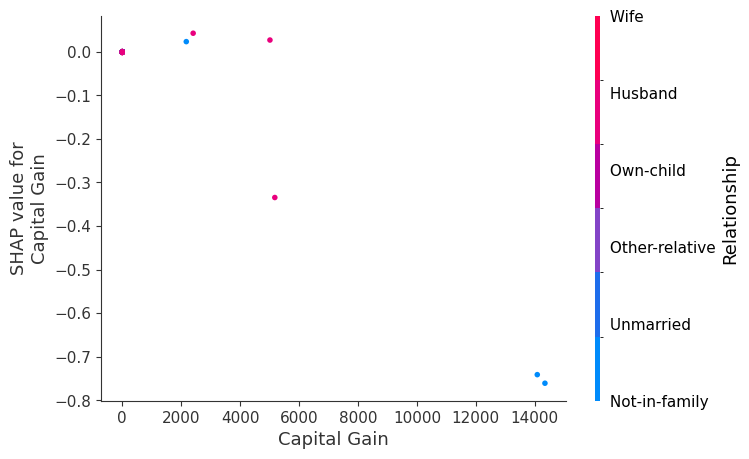

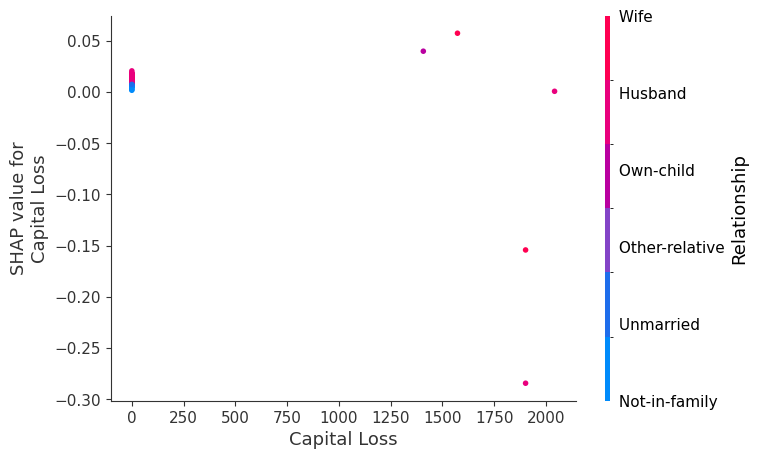

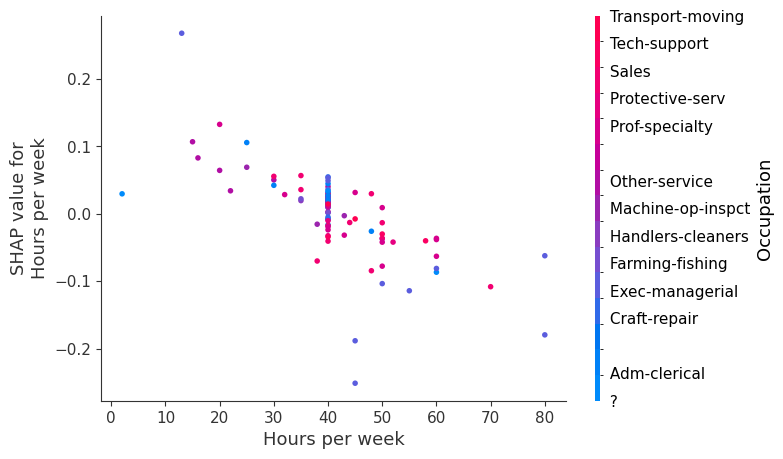

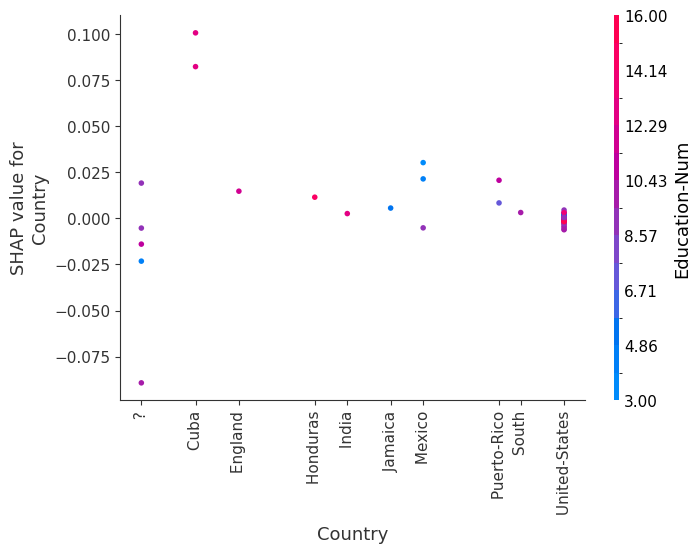

In [ ]:
# Iterate over the X_train.columns and for each feature, plot the shap.dependence_plot

for name in X_train.columns:
    shap.dependence_plot(name,
                         shap_values=shap_values_ndarray, # shapley values of all instances
                         features=sample_data, # sample_data
                         display_features=X_display) # to display meaningful features use X_display

####6.) KernelSHAP

In [21]:
sample_data = X.loc[:10]

sample_X_display = X_display.loc[:100]


sample_data_kernel = shap.sample(X_train, 10)

kernel_explainer = shap.KernelExplainer(rf_clf.predict_proba, data=sample_data_kernel)


# Print the kernel shap_values_explanation
shap_values_explanation_kernel = kernel_explainer(sample_data)
print(type(shap_values_explanation_kernel))
print(shap_values_explanation_kernel[0])
print('-' * 80)


# Class for which we want to analyze the shapley values
class_index = 0  # Note that being a binary classification problem, the shapley values for the other class are -(shapley values of the class_index)


shap_values_ndarray_kernel = kernel_explainer.shap_values(sample_data)[:, :, class_index]

print(type(shap_values_ndarray_kernel))
print(shap_values_ndarray_kernel[0])

# Calculate the expected_value for Kernel SHAP
expected_value_kernel = shap_values_explanation_kernel.base_values[0][class_index] # this is the expected value for the class we want to explain -> class 0

print("\nExpected value")
print(expected_value_kernel)


  0%|          | 0/11 [00:00<?, ?it/s]

<class 'shap._explanation.Explanation'>
.values =
array([[-0.00017554,  0.00017554],
       [ 0.05317704, -0.05317704],
       [-0.04965904,  0.04965904],
       [ 0.11484209, -0.11484209],
       [ 0.0016417 , -0.0016417 ],
       [ 0.14438249, -0.14438249],
       [ 0.        ,  0.        ],
       [-0.00194716,  0.00194716],
       [-0.07082246,  0.07082246],
       [ 0.01980146, -0.01980146],
       [ 0.00276182, -0.00276182],
       [ 0.        ,  0.        ]])

.base_values =
array([0.75254091, 0.24745909])

.data =
array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])
--------------------------------------------------------------------------------


  0%|          | 0/11 [00:00<?, ?it/s]

<class 'numpy.ndarray'>
[-0.00017554  0.05317704 -0.04965904  0.11484209  0.0016417   0.14438249
  0.         -0.00194716 -0.07082246  0.01980146  0.00276182  0.        ]

Expected value
0.7525409067705383


In [22]:
shap_values_ndarray_kernel

array([[-1.75542109e-04,  5.31770413e-02, -4.96590429e-02,
         1.14842091e-01,  1.64170432e-03,  1.44382491e-01,
         0.00000000e+00, -1.94715733e-03, -7.08224555e-02,
         1.98014608e-02,  2.76182339e-03,  0.00000000e+00],
       [ 2.62016036e-03,  6.62905721e-02, -8.75369870e-02,
         2.94333240e-02,  1.53991612e-03, -8.63642862e-02,
         0.00000000e+00, -3.75135996e-03,  0.00000000e+00,
         3.14408128e-02,  3.40802563e-02,  0.00000000e+00],
       [-4.63904435e-04, -1.40976460e-03,  1.67702972e-02,
        -1.10720945e-01,  4.69358299e-04,  2.04530147e-01,
         0.00000000e+00, -2.69691257e-03,  0.00000000e+00,
         2.49198151e-02,  3.85138202e-03,  0.00000000e+00],
       [ 3.39167328e-03, -9.09575954e-04,  7.76695096e-02,
         2.98040146e-02,  6.05365626e-04, -8.50796548e-02,
        -6.21515599e-02, -3.72594202e-03,  0.00000000e+00,
         3.16765826e-02,  5.04880448e-03,  0.00000000e+00],
       [-3.03326200e-03, -1.13014362e-03, -8.5817842

Kernel SHAP - Shapley values

Text(0.5, 1.0, 'Kernel SHAP - Shapley values for instance 1 \n w.r.t 0. Predicted class: 0')

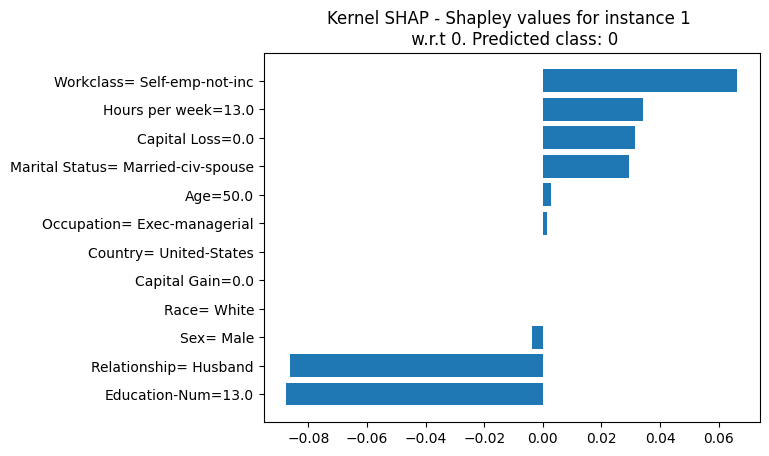

In [23]:
id_instance = 1

# Sort feature indices based on SHAP values using np.argsort()
sorted_indices = np.argsort(shap_values_ndarray_kernel[id_instance])

# Get feature names and values for the instance
feature_names_values = np.array([f'{f}={value}' for f, value in zip(sample_X_display.columns, sample_X_display.iloc[id_instance].values)])

# Plot SHAP values
plt.barh(feature_names_values[sorted_indices], shap_values_ndarray_kernel[id_instance][sorted_indices])

# Predict class for the instance
predicted_class = int(rf_clf.predict(sample_data.iloc[id_instance:id_instance+1])[0])

# Plot title
plt.title(f'Kernel SHAP - Shapley values for instance {id_instance} \n w.r.t {class_index}. Predicted class: {predicted_class}')


Text(0.5, 1.0, 'Kernel SHAP - Shapley values for instance 7 \n w.r.t 0. Predicted class: 0')

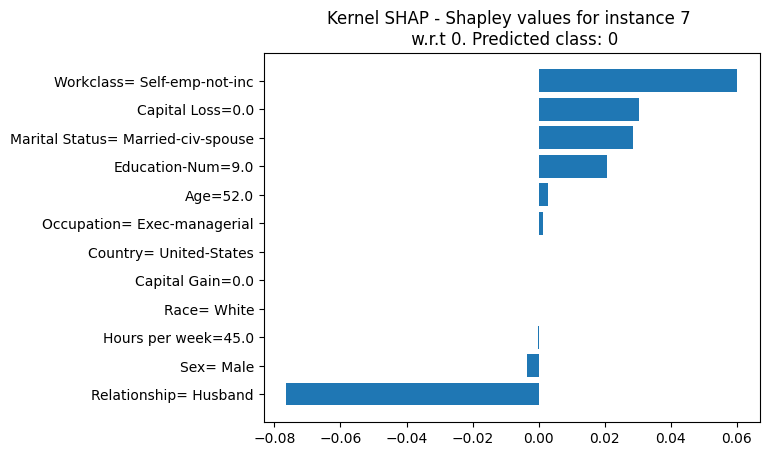

In [24]:
id_instance = 7

# Sort feature indices based on SHAP values
sorted_indices = np.argsort(shap_values_ndarray_kernel[id_instance])

# Get feature names and values for the instance
feature_names_values = np.array([f'{f}={value}' for f, value in zip(sample_X_display.columns, sample_X_display.iloc[id_instance].values)])

# Plot SHAP values
plt.barh(feature_names_values[sorted_indices], shap_values_ndarray_kernel[id_instance][sorted_indices])

# Predict class for the instance
predicted_class = int(rf_clf.predict(sample_data.iloc[id_instance:id_instance+1])[0])

# Plot title
plt.title(f'Kernel SHAP - Shapley values for instance {id_instance} \n w.r.t {class_index}. Predicted class: {predicted_class}')


Kernel SHAP - force_plot

[0.74029332 0.25970668]


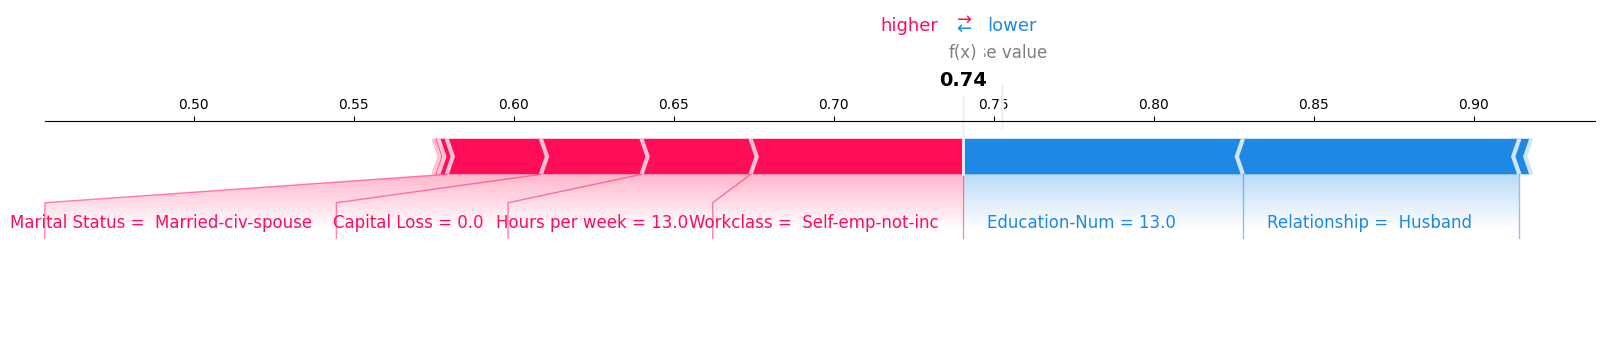

In [26]:
# Kernel SHAP
id_instance = 1


print(rf_clf.predict_proba(sample_data)[id_instance])


shap.force_plot(base_value=expected_value_kernel, # the base_value is the expected_value
                shap_values=shap_values_ndarray_kernel[id_instance, :], # select the shap_value of the considered instance
                features=X_display.iloc[id_instance, :], # Use the X_display dataset to have meaningful result
                matplotlib=True)

[0.8165667 0.1834333]


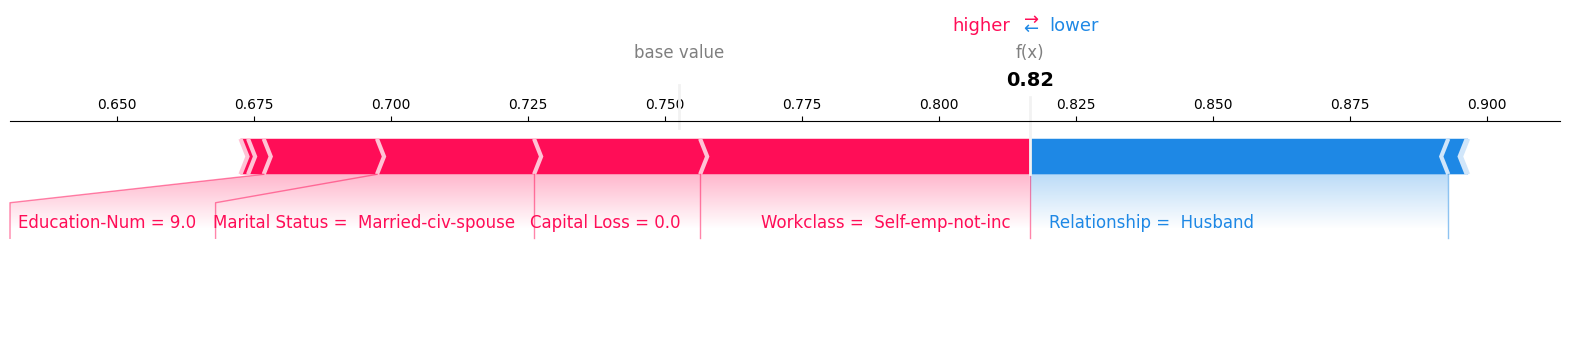

In [28]:
# Kernel SHAP
id_instance = 7
print(rf_clf.predict_proba(sample_data)[id_instance])


shap.force_plot(base_value=expected_value_kernel,
                shap_values=shap_values_ndarray_kernel[id_instance, :],
                features=X_display.iloc[id_instance, :],
                matplotlib=True)

Kernel SHAP - waterfall_plot

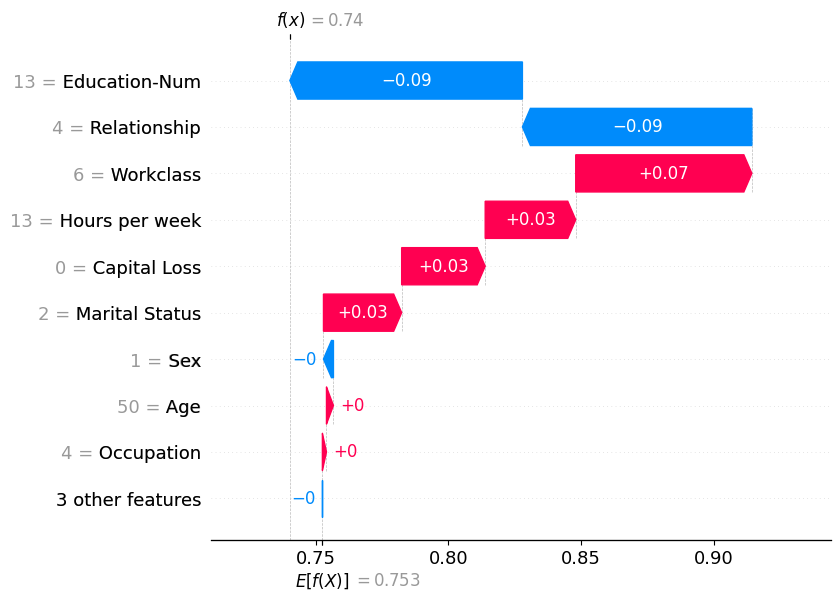

In [29]:
# Kernel SHAP
id = 1
shap.waterfall_plot(shap_values=shap_values_explanation_kernel[id, :, class_index], # select the shap_value_explanation of the considered instance, for the class you want to explain. Nb: this wants an Explanation object.
                    max_display=10)

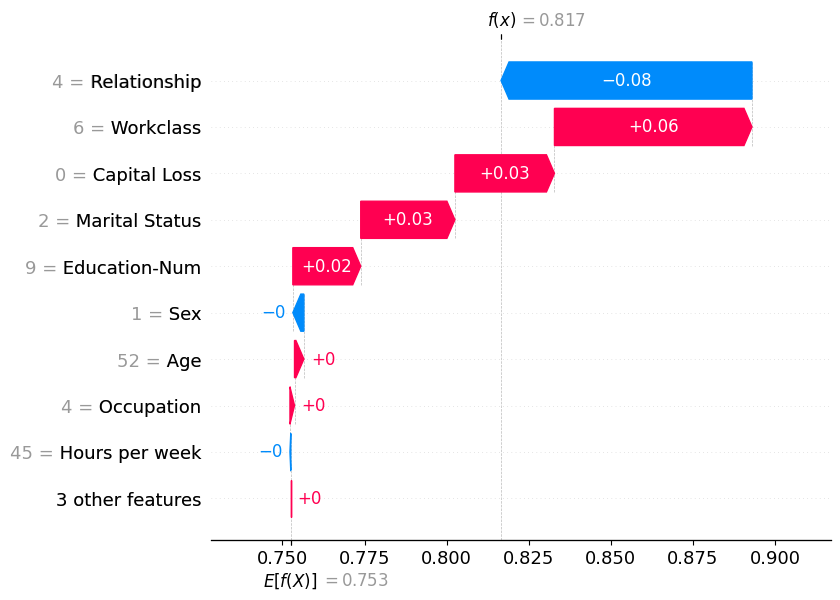

In [30]:
# Kernel SHAP
id = 7
shap.waterfall_plot(shap_values=shap_values_explanation_kernel[id, :, class_index],
                    max_display=10)

Kernel SHAP - force plot for more than one instance

In [32]:
shap.force_plot(base_value=expected_value_kernel,
                shap_values=shap_values_ndarray_kernel[:10, :],
                features=X_display.iloc[:10, :])

Kernel SHAP - summary plot

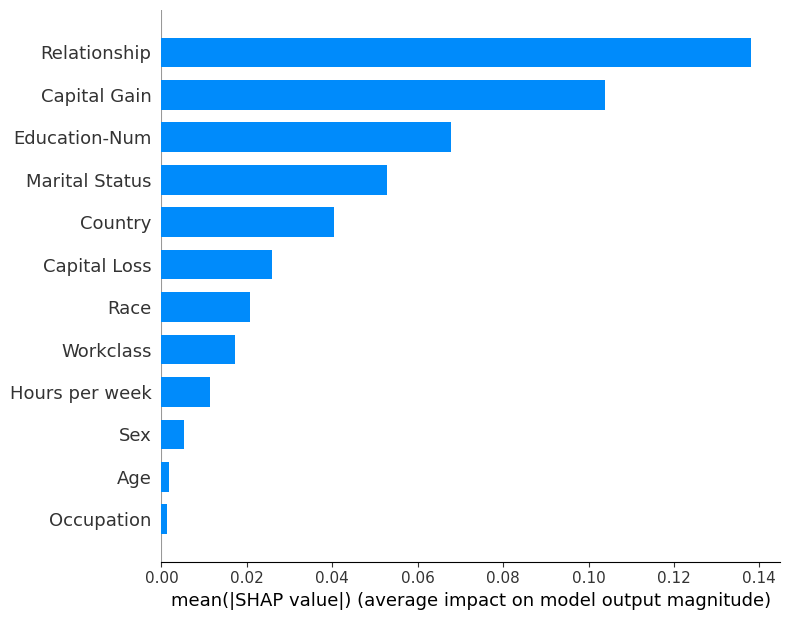

In [33]:
# Summary plot. This consider ALL instances.
shap.summary_plot(shap_values=shap_values_ndarray_kernel,
                  features=X_display, # to display meaningful features use X_display
                  plot_type='bar')

Kernel SHAP - dependence plot

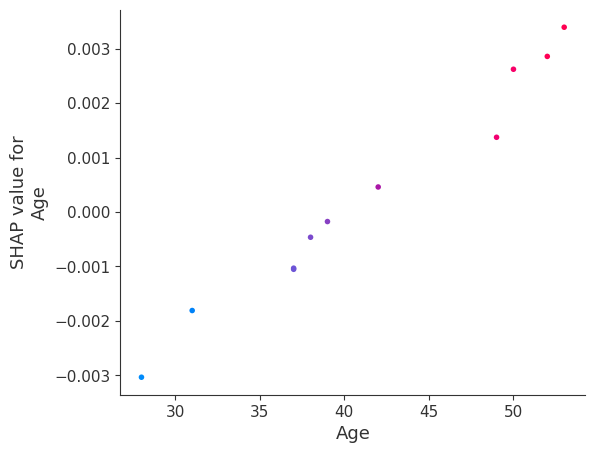

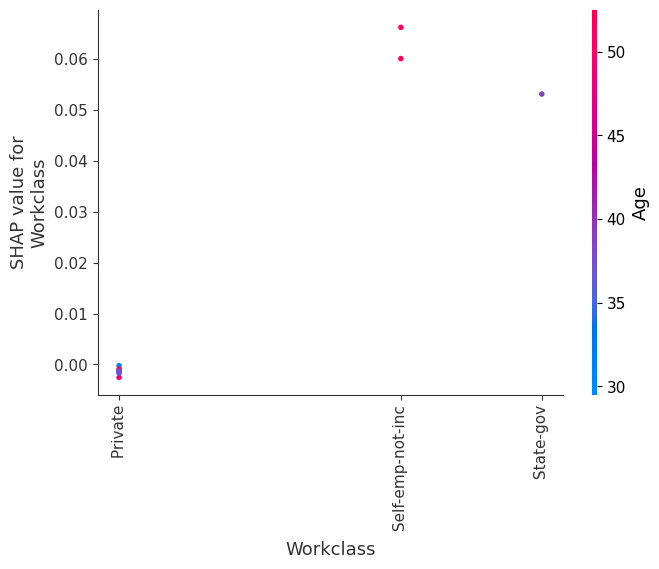

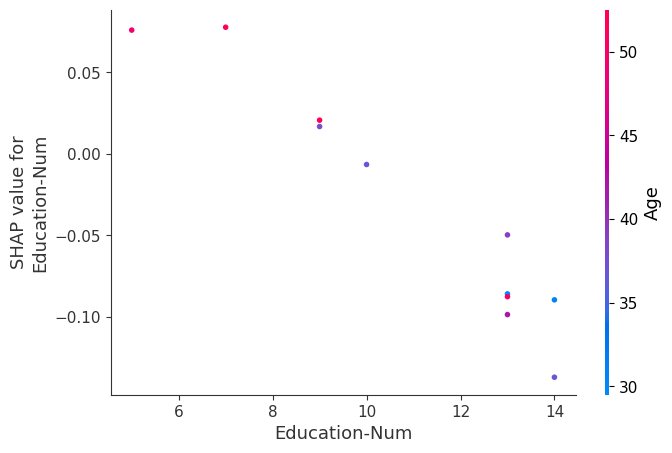

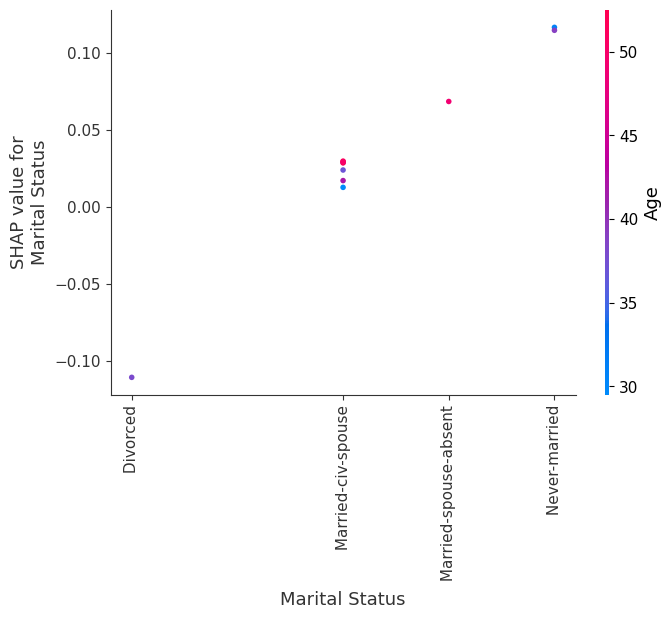

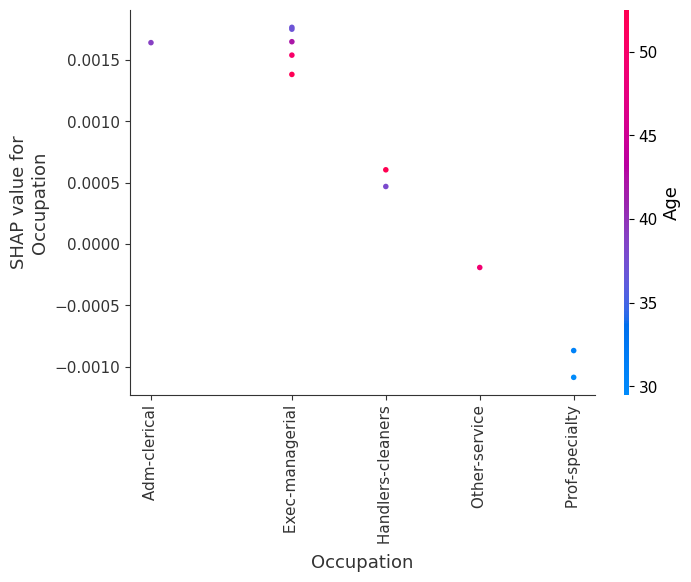

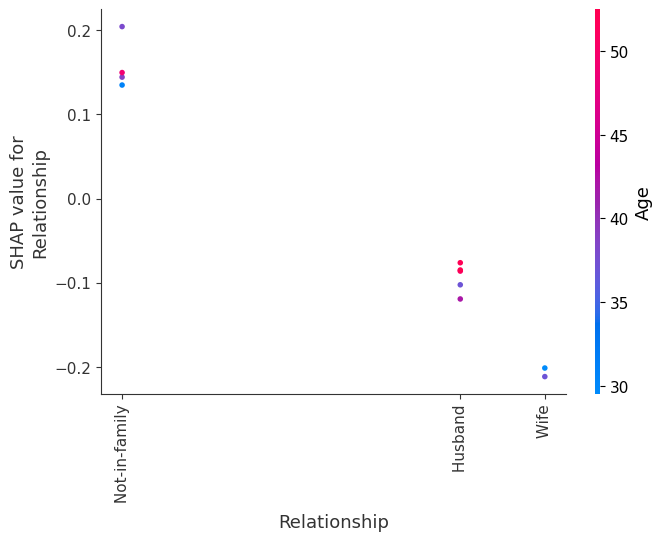

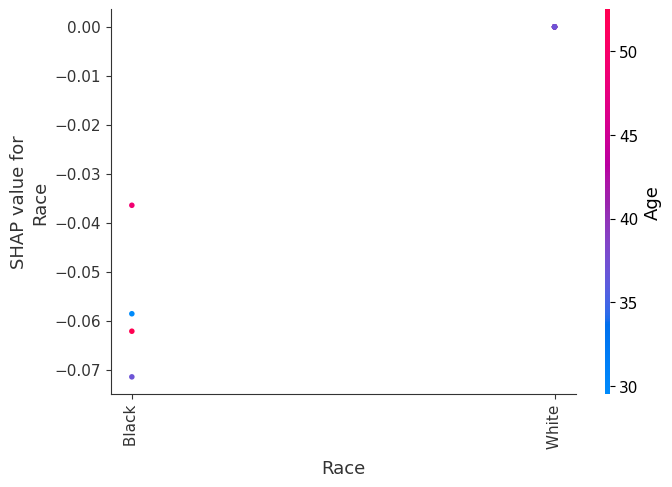

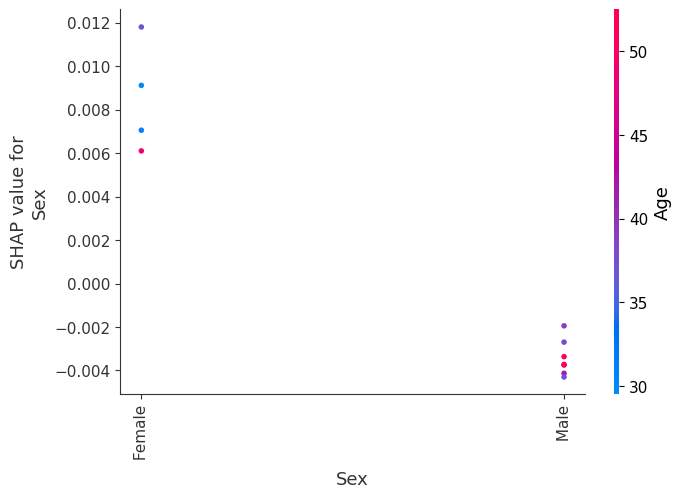

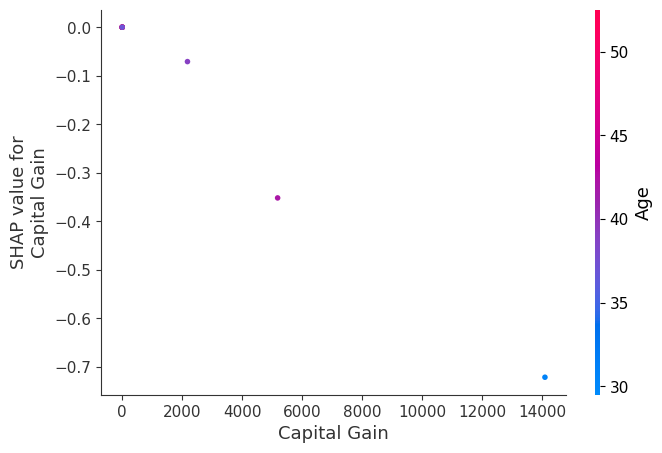

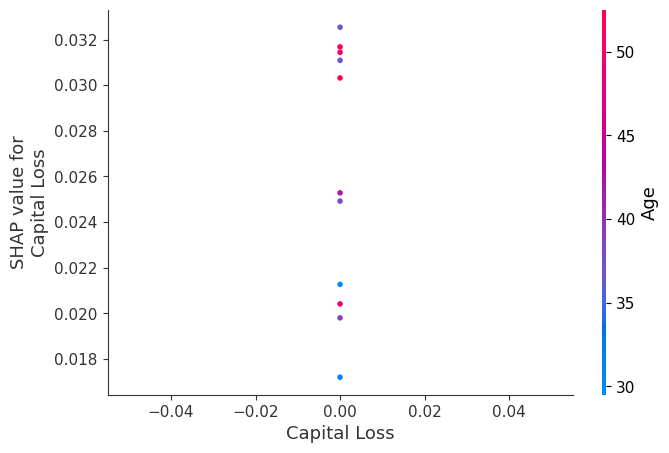

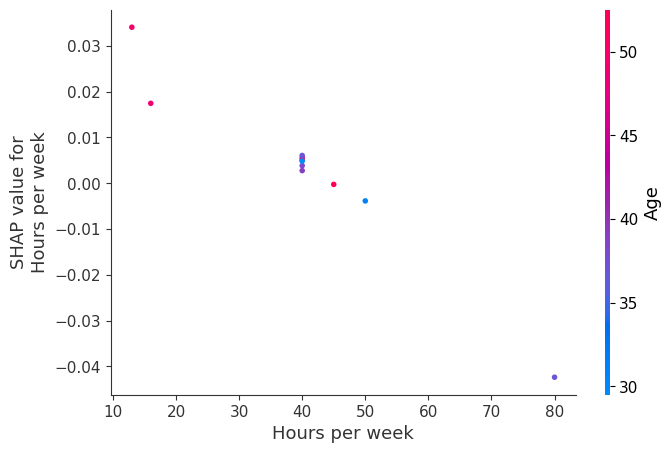

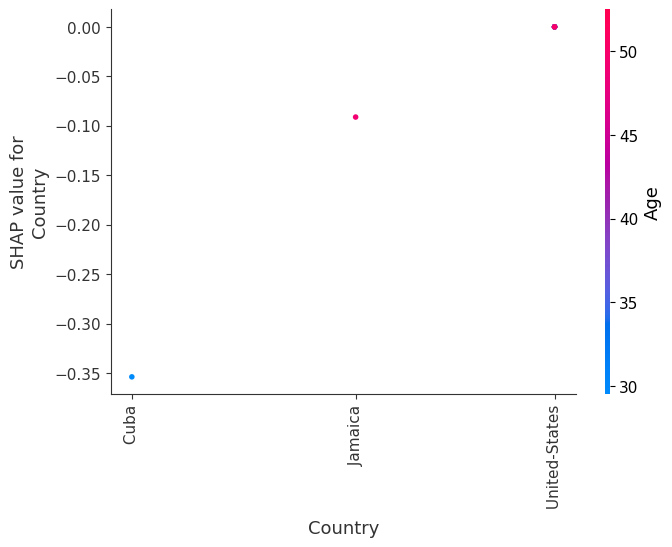

In [34]:
# Iterate over the X_train.columns and for each feature, plot the shap.dependence_plot

for name in X_train.columns:
    shap.dependence_plot(name,
                         shap_values=shap_values_ndarray_kernel, # shapley values of all instances
                         features=sample_data, # sample_data
                         display_features=X_display) # to display meaningful features use X_display

####6.) ExactExplainer

In [22]:
sample_X_display = X_display.loc[:100]


# Now we want to use the ExactExplainer. Since the computation will be too long, now we explain only the first two instances.
sample_data = X.loc[0:1]
masker = shap.maskers.Independent(data = X_train)
exact_explainer = shap.ExactExplainer(rf_clf.predict_proba, masker=masker)

shap_values_explanation_exact = exact_explainer(sample_data)
print(type(shap_values_explanation_exact))
print(shap_values_explanation_exact[0])
print('-' * 80)

# Class we want to explain
class_index = 0

shap_values_ndarray_exact= shap_values_explanation_exact.values[:, :, class_index]
print(type(shap_values_ndarray_exact))
print(shap_values_ndarray_exact[0])

# Calculate the expected_value
expected_value_exact = shap_values_explanation_exact.base_values[0][class_index] # this is the expected value for the class we want to explain -> class 0


<class 'shap._explanation.Explanation'>
.values =
array([[-0.00020007,  0.00020007],
       [ 0.05019656, -0.05019656],
       [-0.03742185,  0.03742185],
       [ 0.0723445 , -0.0723445 ],
       [ 0.00118951, -0.00118951],
       [ 0.13045432, -0.13045432],
       [ 0.00408033, -0.00408033],
       [-0.00107562,  0.00107562],
       [-0.04776241,  0.04776241],
       [ 0.00466242, -0.00466242],
       [ 0.00122117, -0.00122117],
       [ 0.01584499, -0.01584499]])

.base_values =
array([0.77300948, 0.22699052])

.data =
array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])
--------------------------------------------------------------------------------
<class 'numpy.ndarray'>
[-0.00020007  0.05019656 -0.03742185  0.0723445   0.00118951  0.13045432
  0.00408033 -0.00107562 -0.04776241  0.00466242  0.00122117  0.01584499]


Exact SHAP - Shapley values

Text(0.5, 1.0, 'Exact SHAP - Shapley values for instance 0 \n w.r.t 0. Predicted class: 0')

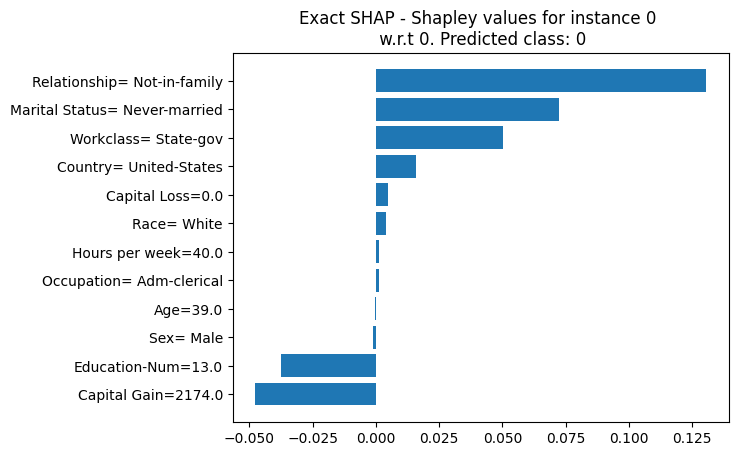

In [18]:
id_instance = 0

# Sort feature indices based on SHAP values using np.argsort()
sorted_indices = np.argsort(shap_values_ndarray_exact[id_instance])

# Get feature names and values for the instance
feature_names_values = np.array([f'{f}={value}' for f, value in zip(sample_X_display.columns, sample_X_display.iloc[id_instance].values)])

# Plot SHAP values
plt.barh(feature_names_values[sorted_indices], shap_values_ndarray_exact[id_instance][sorted_indices])

# Predict class for the instance
predicted_class = int(rf_clf.predict(sample_data.iloc[id_instance:id_instance+1])[0])

# Plot title
plt.title(f'Exact SHAP - Shapley values for instance {id_instance} \n w.r.t {class_index}. Predicted class: {predicted_class}')


Text(0.5, 1.0, 'Exact SHAP - Shapley values for instance 1 \n w.r.t 0. Predicted class: 0')

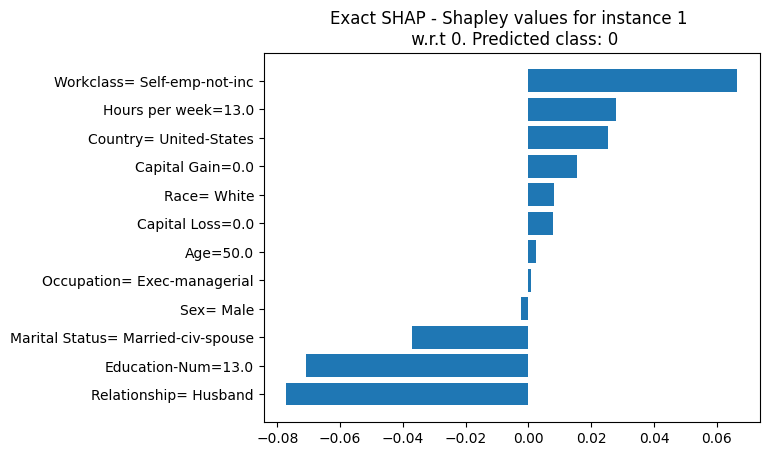

In [19]:
id_instance = 1

# Sort feature indices based on SHAP values
sorted_indices = np.argsort(shap_values_ndarray_exact[id_instance])

# Get feature names and values for the instance
feature_names_values = np.array([f'{f}={value}' for f, value in zip(sample_X_display.columns, sample_X_display.iloc[id_instance].values)])

# Plot SHAP values
plt.barh(feature_names_values[sorted_indices], shap_values_ndarray_exact[id_instance][sorted_indices])

# Predict class for the instance
predicted_class = int(rf_clf.predict(sample_data.iloc[id_instance:id_instance+1])[0])

# Plot title
plt.title(f'Exact SHAP - Shapley values for instance {id_instance} \n w.r.t {class_index}. Predicted class: {predicted_class}')


Exact SHAP - force_plot

[0.96654332 0.03345668]


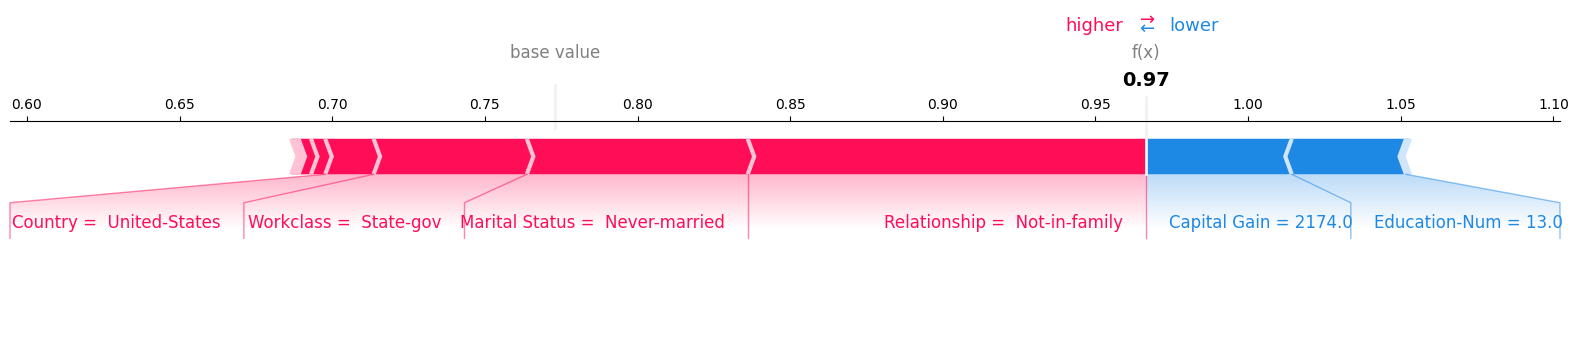

In [23]:
# Exact SHAP
id_instance = 0


print(rf_clf.predict_proba(sample_data)[id_instance])


shap.force_plot(base_value=expected_value_exact, # the base_value is the expected_value
                shap_values=shap_values_ndarray_exact[id_instance, :], # select the shap_value of the considered instance
                features=X_display.iloc[id_instance, :], # Use the X_display dataset to have meaningful result
                matplotlib=True)

[0.74029332 0.25970668]


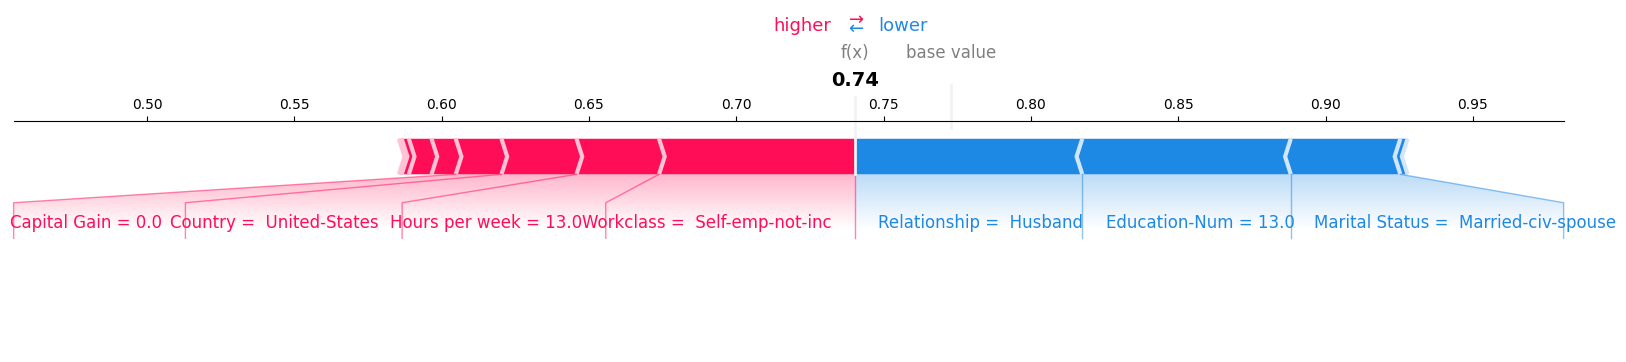

In [24]:
# Exact SHAP
id_instance = 1
print(rf_clf.predict_proba(sample_data)[id_instance])


shap.force_plot(base_value=expected_value_exact,
                shap_values=shap_values_ndarray_exact[id_instance, :],
                features=X_display.iloc[id_instance, :],
                matplotlib=True)

Exact SHAP - waterfall_plot

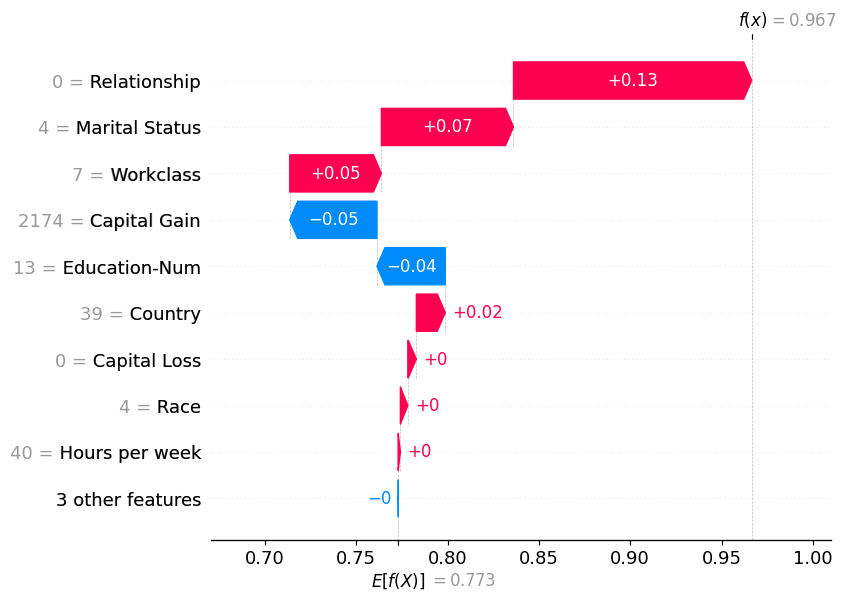

In [27]:
# Exact SHAP
id = 0
shap.waterfall_plot(shap_values=shap_values_explanation_exact[id, :, class_index], # select the shap_value_explanation of the considered instance, for the class you want to explain. Nb: this wants an Explanation object.
                    max_display=10)

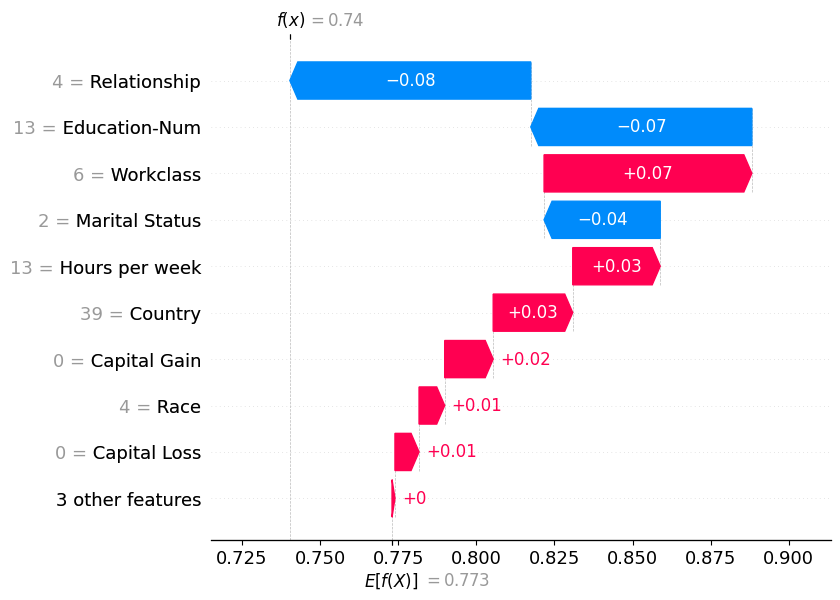

In [28]:
# Exact SHAP
id = 1
shap.waterfall_plot(shap_values=shap_values_explanation_exact[id, :, class_index],
                    max_display=10)

Exact SHAP - force plot for more than one instance

In [29]:
shap.force_plot(base_value=expected_value_exact,
                shap_values=shap_values_ndarray_exact[:10, :],
                features=X_display.iloc[:10, :])

Exact SHAP - summary plot

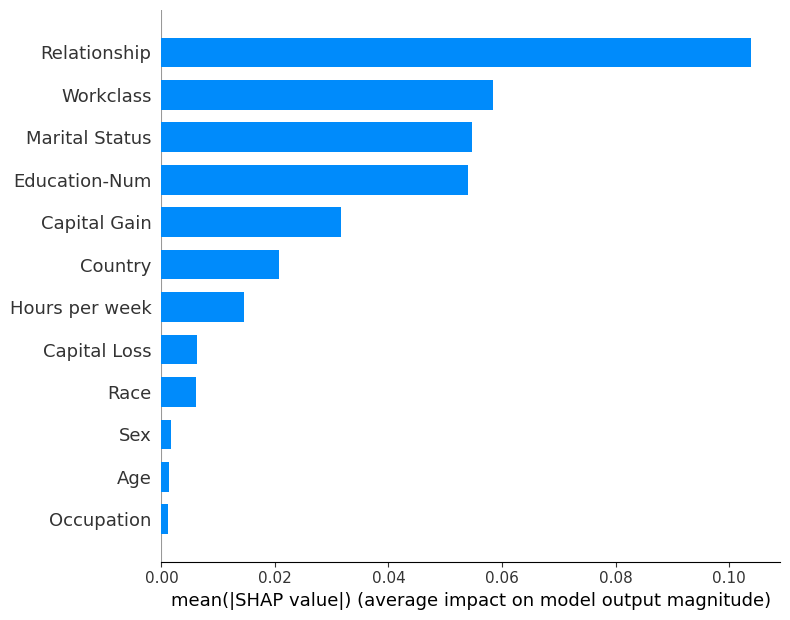

In [30]:
# Summary plot. This consider ALL instances.
shap.summary_plot(shap_values=shap_values_ndarray_exact,
                  features=X_display, # to display meaningful features use X_display
                  plot_type='bar')

Exact SHAP - dependence plot

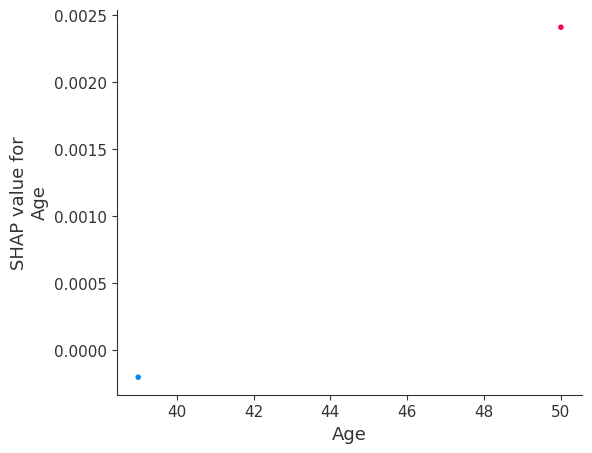

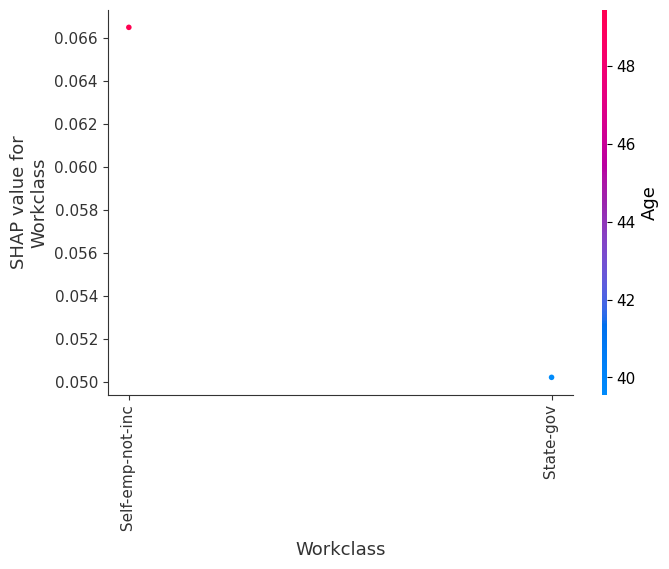

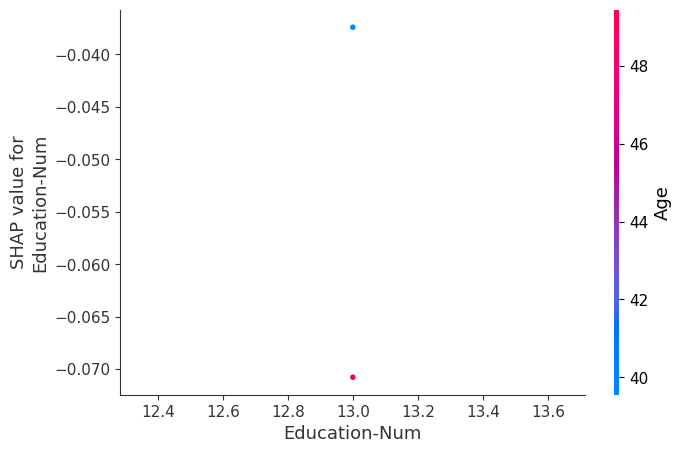

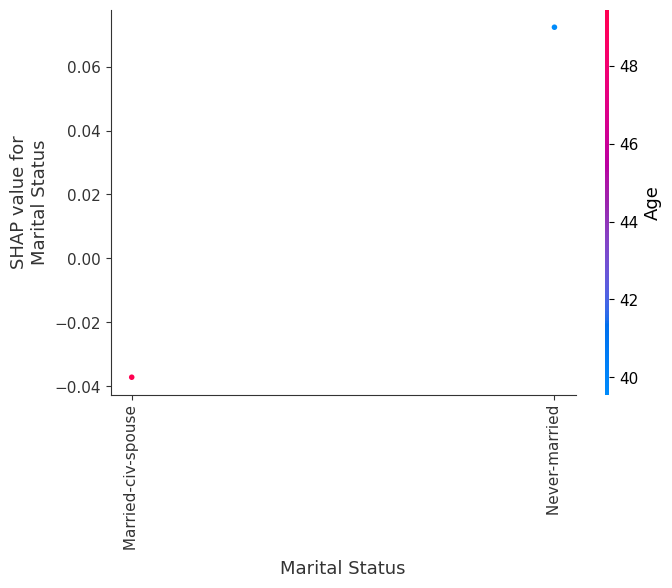

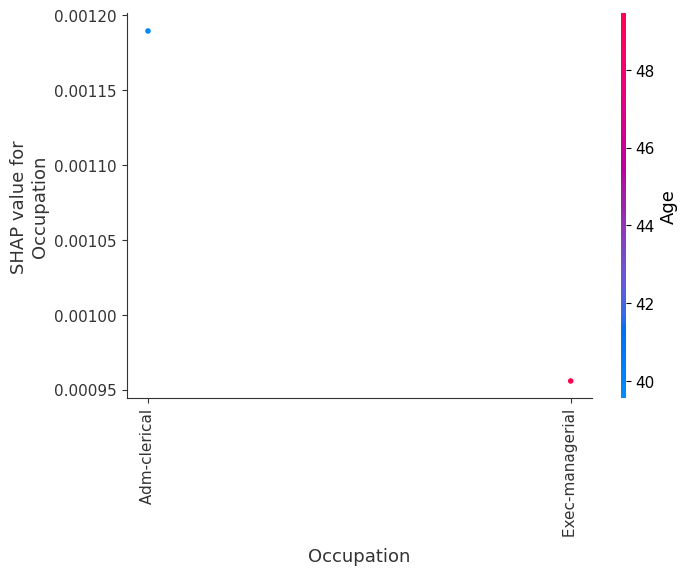

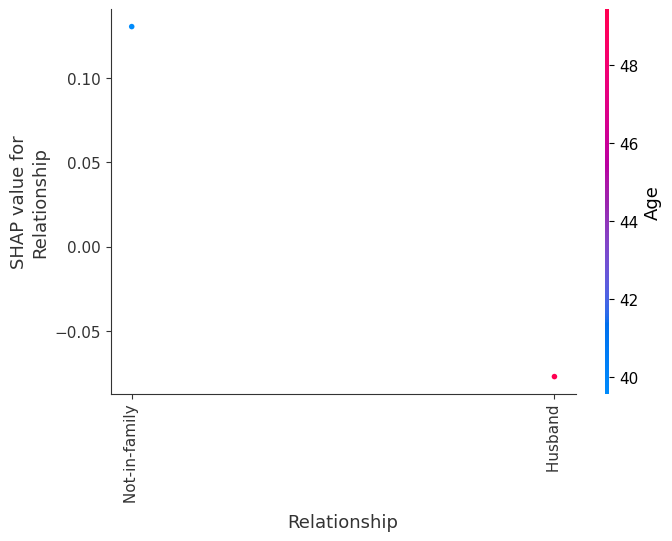

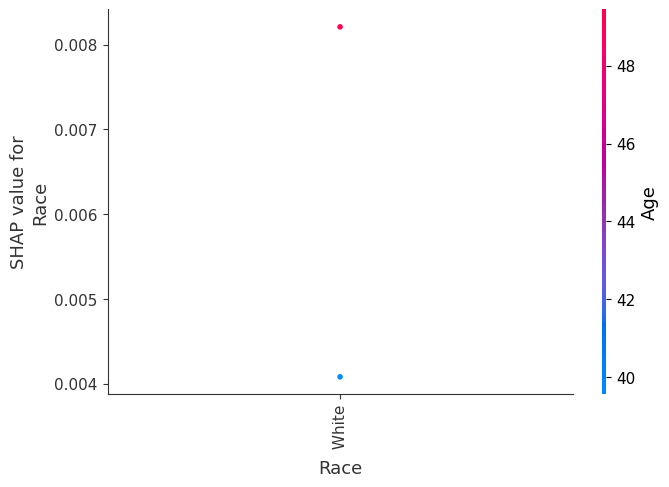

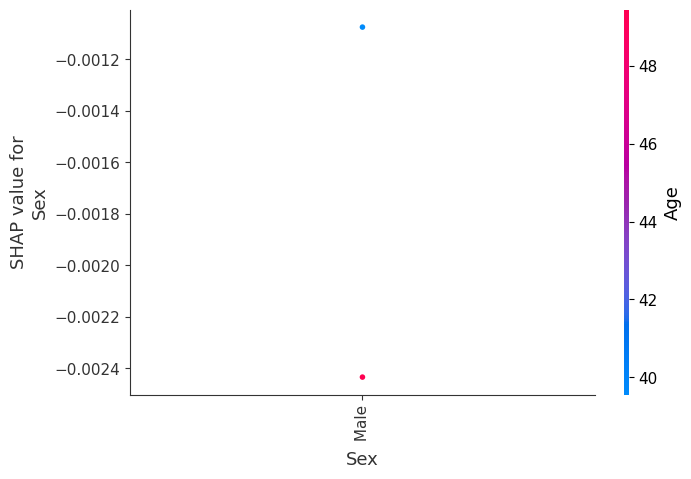

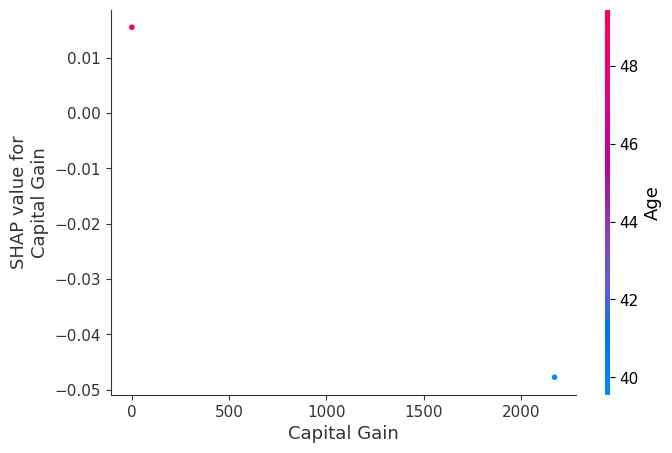

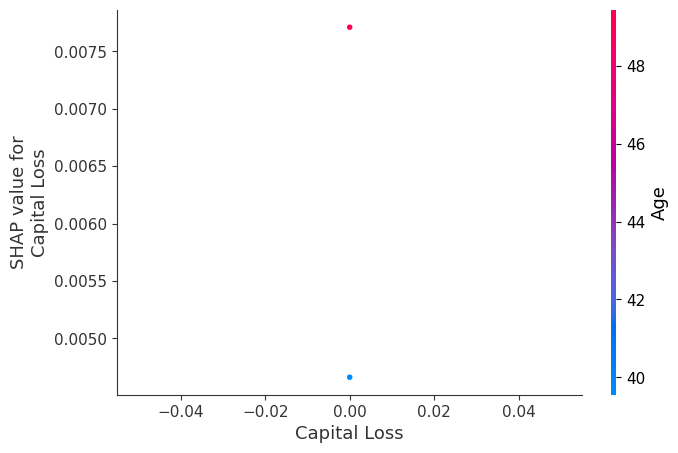

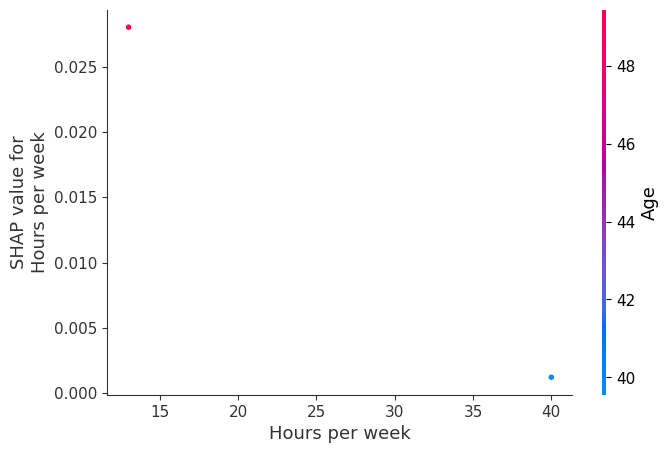

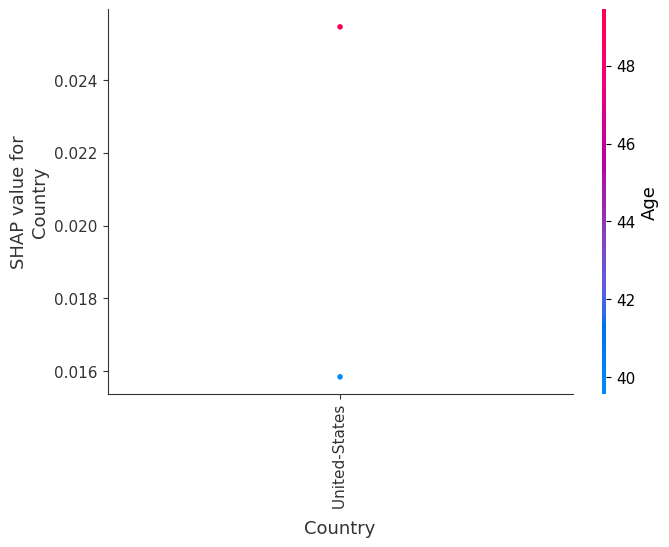

In [31]:
# Iterate over the X_train.columns and for each feature, plot the shap.dependence_plot

for name in X_train.columns:
    shap.dependence_plot(name,
                         shap_values=shap_values_ndarray_exact, # shapley values of all instances
                         features=sample_data, # sample_data
                         display_features=X_display) # to display meaningful features use X_display